# Deep Neural Network
Zehua Wang, biostat625 final project

## Imports

In [108]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Cleaning

In [ ]:
# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [67]:
# load data
bike_data = pd.read_csv('data/SeoulBikeData.csv', encoding = 'unicode_escape')
# add year, month, day, and days of week
bike_data['Date'] = pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Month'] = pd.DatetimeIndex(bike_data['Date']).month
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['DWeek'] = pd.DatetimeIndex(bike_data['Date']).weekday
bike_data.columns = (['Date','Rented_Bike_Count', 'Hour', 'Temperature',
                      'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temp',
                      'Solar_Rad', 'Rainfall', 'Snowfall', 'Seasons', 
                      'Holiday', 'Funct_Day','Year', 'Month', 'Day', 'DWeek'])
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,3


In [68]:
bike_data['Seasons'] = pd.factorize(bike_data['Seasons'])[0]
bike_data['Funct_Day'] = pd.factorize(bike_data['Funct_Day'])[0]
bike_data['Holiday'] = pd.factorize(bike_data['Holiday'])[0]

In [69]:
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Funct_Day,Year,Month,Day,DWeek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,2017,1,12,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,2017,1,12,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,2017,1,12,3


In [76]:
## split data into a train and test set
bike_data = bike_data.sample(frac = 1, random_state = 625).\
                reset_index(drop = True)
data_size = bike_data.shape[0]
trainset = bike_data.iloc[:round(data_size*0.7), 1:].reset_index(drop = True)
valset = bike_data.iloc[round(data_size*0.7):round(data_size*0.8), 1:].reset_index(drop = True)
testset = bike_data.iloc[round(data_size*0.8):, 1:].reset_index(drop = True)

## Neural Network

In [103]:
# data prepare
X_train = trainset.iloc[:, 1:]
y_train = trainset.iloc[:, 0]
X_val = valset.iloc[:, 1:]
y_val = valset.iloc[:, 0]
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.shuffle(len(X_train)).batch(4)
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val = train.shuffle(len(X_train)).batch(1)

In [102]:
# model 1
mod1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])
mod1.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)
mod1.history = mod1.fit(train, epochs = 16, validation_data = val)
mod1_loss = mod1.evaluate(val)
print('Model 1 Loss {}'.format(mod1_loss))

Epoch 1/15
6132/6132 [==============================] - 23s 4ms/step - loss: 409503.7188 - val_loss: 318351.1562
Epoch 2/15
6132/6132 [==============================] - 24s 4ms/step - loss: 285610.6562 - val_loss: 254533.2031
Epoch 3/15
6132/6132 [==============================] - 28s 5ms/step - loss: 248956.3281 - val_loss: 248657.5156
Epoch 4/15
6132/6132 [==============================] - 26s 4ms/step - loss: 236508.4531 - val_loss: 227097.2969
Epoch 5/15
6132/6132 [==============================] - 25s 4ms/step - loss: 229645.2812 - val_loss: 225260.7188
Epoch 6/15
6132/6132 [==============================] - 26s 4ms/step - loss: 226271.8281 - val_loss: 223947.6250
Epoch 7/15
6132/6132 [==============================] - 27s 4ms/step - loss: 224598.5781 - val_loss: 235206.1094
Epoch 8/15
6132/6132 [==============================] - 30s 5ms/step - loss: 224262.3594 - val_loss: 219018.5469
Epoch 9/15
6132/6132 [==============================] - 27s 4ms/step - loss: 222019.8438 - val_l

In [105]:
# model 2
mod2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
mod2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
)
mod2.history = mod2.fit(train, epochs = 16, validation_data = val)
mod2_loss = mod1.evaluate(val)
print('Model 2 Loss {}'.format(mod2_loss))

Epoch 1/16
1533/1533 [==============================] - 9s 6ms/step - loss: 916972.5625 - val_loss: 916972.1250
Epoch 2/16
1533/1533 [==============================] - 8s 5ms/step - loss: 916972.6875 - val_loss: 916972.3125
Epoch 3/16
1533/1533 [==============================] - 9s 6ms/step - loss: 916972.8750 - val_loss: 916972.4375
Epoch 4/16
1533/1533 [==============================] - 10s 6ms/step - loss: 916972.8750 - val_loss: 916973.3750
Epoch 5/16
1533/1533 [==============================] - 9s 6ms/step - loss: 916971.5625 - val_loss: 916972.0625
Epoch 6/16
1533/1533 [==============================] - 10s 6ms/step - loss: 916972.6250 - val_loss: 916972.1250
Epoch 7/16
1533/1533 [==============================] - 10s 6ms/step - loss: 916973.6875 - val_loss: 916972.0625
Epoch 8/16
1533/1533 [==============================] - 10s 6ms/step - loss: 916972.8125 - val_loss: 916972.5625
Epoch 9/16
1533/1533 [==============================] - 12s 8ms/step - loss: 916972.9375 - val_loss:

In [107]:
print(mod2.history.history.keys())

dict_keys(['loss', 'val_loss'])


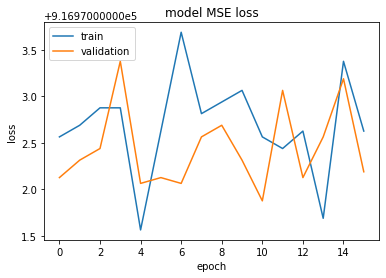

In [109]:
plt.plot(mod2.history.history['loss'])
plt.plot(mod2.history.history['val_loss'])
plt.title('model MSE loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()